In [1]:
!pip install pyldavis
!pip install pandas==1.5.3
!gdown 'https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
Downloading...
From (original): https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul
From (redirected): https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul&confirm=t&uuid=5d261963-82ab-4e9c-a593-f3f8c76dfe9e
To:

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

# Importing modules
import os
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
import gensim.corpora as corpora
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.manifold import TSNE

Mounted at /content/gdrive


In [3]:
# Import dataset
sp = pd.read_csv("/content/gdrive/MyDrive/PubMed Multi Label Text Classification Dataset Processed.csv", encoding="utf-8")
# Remove columns not useful for our analysis
sp.drop(sp.columns[ [0, 3, 4, 5]], axis=1, inplace=True)
sp.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abstractText,meshMajor,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",1,1,0,1,1,0,1,0,0,1,0,0,0,0


# Data Quality

In [4]:
# Delete every duplicate
sp=sp.drop_duplicates()
sp = sp.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Check for NAs
sp.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


abstractText    0
meshMajor       0
A               0
B               0
C               0
D               0
E               0
F               0
G               0
H               0
I               0
J               0
L               0
M               0
N               0
Z               0
dtype: int64

# Data Exploration


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                        abstractText  word_count
0  Fifty-four paraffin embedded tissue sections f...         114
1  The present cross-sectional study was conducte...         249
2  The occurrence of individual amino acids and d...         106
3  In 1980, Lim and Sun introduced a microcapsule...         265
4  Substantially improved hydrogel particles base...         234


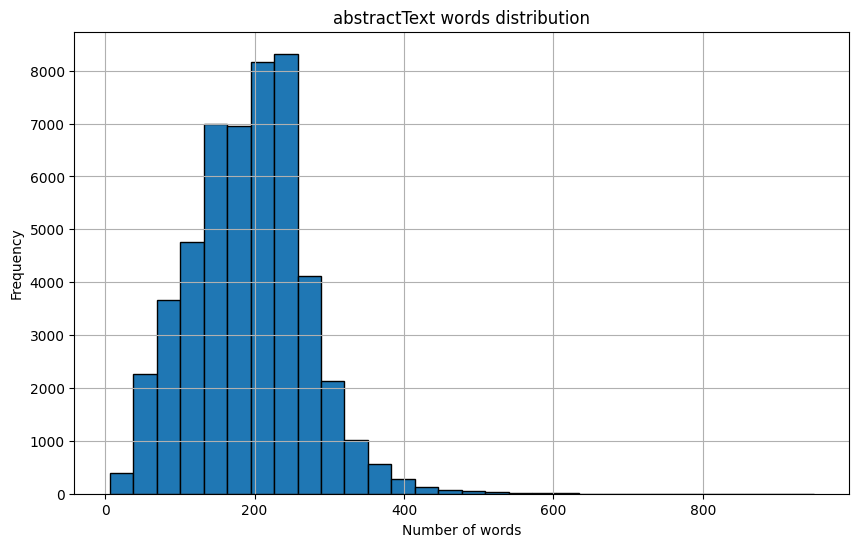

In [6]:
# Count number of words for each observation of the column abstractText
sp['word_count'] = sp['abstractText'].apply(lambda x: len(str(x).split()))
print(sp[['abstractText', 'word_count']].head())

plt.figure(figsize=(10, 6))
plt.hist(sp['word_count'], bins=30, edgecolor='black')
plt.title('abstractText words distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


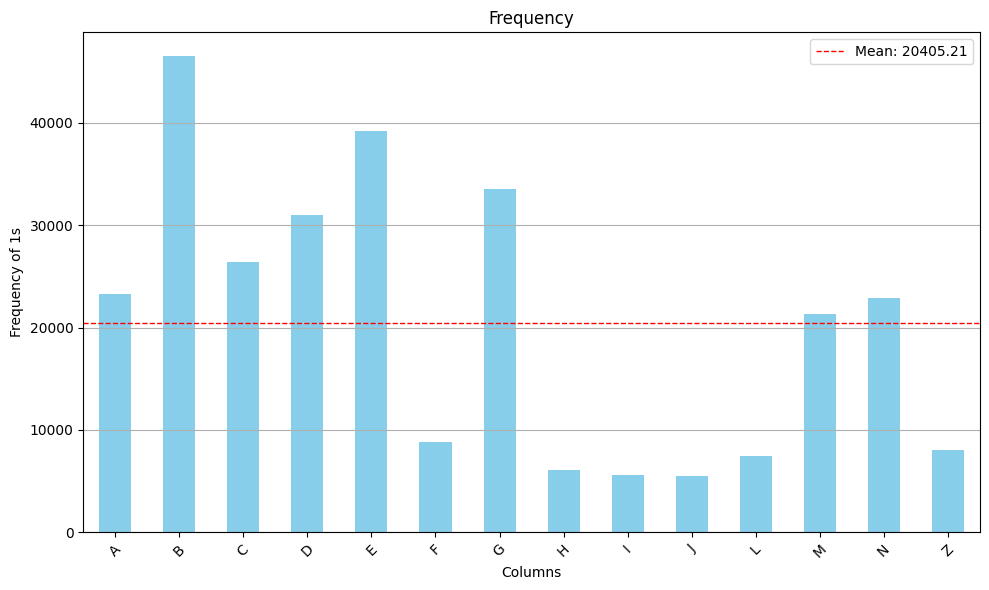

In [7]:
# Frequency of class 1 for each column from A to Z
one_freq = (sp.iloc[:, 2:16] == 1).sum()

# Calculate the mean frequency
mean_freq = one_freq.mean()

plt.figure(figsize=(10, 6))
one_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency')
plt.xlabel('Columns')
plt.ylabel('Frequency of 1s')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(mean_freq, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_freq:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Text pre-processing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Tokenization, Normalization, Stop-words removal and Lemmatization

In [ ]:
stopWords = set(stopwords.words('english'))
lemma = nltk.WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#remove newline characters
sp["abstractText"] = sp["abstractText"].replace(r'\n',' ', regex=True)
sp.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abstractText,meshMajor,A,B,C,D,E,F,G,H,I,J,L,M,N,Z,word_count
0,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",0,1,1,1,1,0,0,1,0,0,0,0,0,0,114
1,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",0,1,1,1,1,1,1,0,1,1,0,1,1,1,249
2,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",1,1,0,1,1,0,1,0,0,0,1,0,0,0,106
3,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",1,1,1,1,1,0,1,0,0,1,0,0,0,0,265
4,Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",1,1,0,1,1,0,1,0,0,1,0,0,0,0,234


In [ ]:
def preprocessing(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Normalization (convert to lowercase)
    tokens = [word.lower() for word in tokens]

    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Stop-word removal
    tokens = [word for word in tokens if word not in stopWords]

    # Lemmatization
    tokens = [lemma.lemmatize(word) for word in tokens]

    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create column containing tokens
sp['Tokens'] = sp['abstractText'].apply(preprocessing)
sp['Tokens'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [paraffin, embedded, tissue, section, patient,...
1    [present, study, conducted, determine, vitamin...
2    [occurrence, individual, amino, acid, dipeptid...
3    [lim, sun, introduced, microcapsule, coated, c...
4    [substantially, improved, hydrogel, particle, ...
Name: Tokens, dtype: object

# Classification

In [ ]:
# Convert the columns values for each observation in an array y, that will be our target
y = np.asarray(sp[sp.columns[2:16]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a tfidf matrix representation
tfidf = TfidfVectorizer(stop_words='english', max_features=1000) #without max_features it's too computationally heavy, 5000 is much slower than 1000 and has similar results,
 #(f1 weighted averege is 0.83, just slightly better)
# takes raw data in input to create training and test sets
X = tfidf.fit_transform(sp['abstractText']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LOGISTIC REGRESSION

In [ ]:
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=sp.columns[2:16]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report:
              precision    recall  f1-score   support

           A       0.81      0.76      0.78      4657
           B       0.95      0.99      0.97      9323
           C       0.87      0.83      0.85      5332
           D       0.91      0.90      0.91      6195
           E       0.81      0.96      0.88      7796
           F       0.86      0.62      0.72      1751
           G       0.83      0.90      0.86      6707
           H       0.66      0.13      0.22      1223
           I       0.78      0.47      0.59      1127
           J       0.78      0.29      0.42      1122
           L       0.78      0.39      0.52      1462
           M       0.87      0.87      0.87      4229
           N       0.81      0.77      0.79      4516
           Z       0.76      0.55      0.64      1608

   micro avg       0.86      0.82      0.84     57048
   macro avg       0.82      0.67      0.72     57048
weighted avg       0.85      0.82      0.83     57048
 sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
#svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=False)) #kernel='poly' or kernel='rbf' da provare
#svm_classifier.fit(X_train, y_train)
#y_pred = svm_classifier.predict(X_test)
#print("Classification Report:")
#print(classification_report(y_test, y_pred, target_names=sp.columns[2:16]))
# this code is commented so you can see result but won't risk running it, since it would take a lot of time(1,15 hours) and would delete the result you can see below

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.70      0.74      4657
           B       0.95      0.99      0.97      9323
           C       0.86      0.81      0.83      5332
           D       0.91      0.87      0.89      6195
           E       0.78      1.00      0.88      7796
           F       0.80      0.56      0.66      1751
           G       0.81      0.89      0.85      6707
           H       0.00      0.00      0.00      1223
           I       0.76      0.39      0.52      1127
           J       0.00      0.00      0.00      1122
           L       0.79      0.23      0.36      1462
           M       0.86      0.86      0.86      4229
           N       0.81      0.75      0.78      4516
           Z       0.72      0.51      0.60      1608

   micro avg       0.84      0.80      0.82     57048
   macro avg       0.70      0.61      0.64     57048
weighted avg       0.81      0.80      0.79     57048
 sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=sp.columns[2:16]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report - Random Forest:
              precision    recall  f1-score   support

           A       0.77      0.66      0.71      4657
           B       0.94      1.00      0.97      9323
           C       0.82      0.80      0.81      5332
           D       0.86      0.85      0.86      6195
           E       0.79      0.99      0.88      7796
           F       0.83      0.26      0.40      1751
           G       0.79      0.90      0.84      6707
           H       0.50      0.00      0.00      1223
           I       0.79      0.18      0.30      1127
           J       1.00      0.00      0.01      1122
           L       0.83      0.10      0.18      1462
           M       0.83      0.87      0.85      4229
           N       0.81      0.71      0.75      4516
           Z       0.75      0.27      0.40      1608

   micro avg       0.83      0.77      0.80     57048
   macro avg       0.81      0.54      0.57     57048
weighted avg       0.83      0.77      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BIGRAMS

In [ ]:
# this time we need a different tfidf matrix, we create it using bigrams not just single words
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000) # Bigram feature extraction

# Transform the abstractText column
X = tfidf.fit_transform(sp['abstractText']).toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=sp.columns[2:16]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.59      0.65      4657
           B       0.94      1.00      0.97      9323
           C       0.81      0.71      0.76      5332
           D       0.78      0.86      0.82      6195
           E       0.78      0.99      0.87      7796
           F       0.72      0.27      0.39      1751
           G       0.76      0.90      0.82      6707
           H       0.55      0.02      0.03      1223
           I       0.67      0.20      0.31      1127
           J       0.60      0.03      0.06      1122
           L       0.71      0.12      0.21      1462
           M       0.83      0.73      0.78      4229
           N       0.77      0.65      0.71      4516
           Z       0.66      0.30      0.42      1608

   micro avg       0.80      0.74      0.77     57048
   macro avg       0.74      0.53      0.56     57048
weighted avg       0.79      0.74      0.74     57048
 sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification with word embeddings

In [ ]:
tokens = sp['Tokens'].values  # 'Tokens' is stored as a string representation of a list
y = sp.iloc[:, 2:16].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

# Save the model if needed
word2vec_model.save("word2vec.model")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Should initialize the Tokenizer with the vocabulary size of the dataset, but it's too high
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts([' '.join(token_list) for token_list in tokens])  # Fit on the joined tokens

# Get the word index
word_index = tokenizer.word_index

# Create the embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert tokens to sequences
sequences = tokenizer.texts_to_sequences([' '.join(token_list) for token_list in tokens])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(sequences, maxlen=500)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create the model(neural network)
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=500,
                    trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='sigmoid'))  # 14 output units for multilabel classification

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))
#waaaaaaay to slow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
1249/1249 [==============================] - 2105s 2s/step - loss: 0.3669 - accuracy: 0.3735 - val_loss: 0.3199 - val_accuracy: 0.4085
Epoch 2/10
 356/1249 [=======>......................] - ETA: 22:21 - loss: 0.3378 - accuracy: 0.3916

KeyboardInterrupt: 

In [ ]:
# We decided to interrupt the ccell above cause it was taking too much time, with the training made it still performed really good, brobably would have made better,
# but it was too time consuming
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# If you want to see more detailed metrics, you might need to use scikit-learn's metrics
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


313/313 [==============================] - 174s 555ms/step - loss: 0.3149 - accuracy: 0.4219
Validation Loss: 0.3149053156375885
Validation Accuracy: 0.4219329059123993
313/313 [==============================] - 170s 540ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4657
           1       0.95      0.99      0.97      9323
           2       0.85      0.85      0.85      5332
           3       0.90      0.91      0.91      6195
           4       0.79      0.98      0.88      7796
           5       0.78      0.70      0.74      1751
           6       0.82      0.89      0.85      6707
           7       0.62      0.01      0.01      1223
           8       0.68      0.50      0.58      1127
           9       0.63      0.20      0.30      1122
          10       0.78      0.25      0.38      1462
          11       0.85      0.91      0.88      4229
          12       0.80      0.76      0.78      4516
          13   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Topic Modeling


In [ ]:
topictask=sp
# Create Dictionary
id2word = corpora.Dictionary(topictask['Tokens'])
id2word.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus
texts = topictask['Tokens']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 2), (7, 3), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


LATENT DIRICHLET ALLOCATION

In [ ]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       eta="auto",
                                       per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 words for each topic found
for t in lda_model.print_topics():
    print(t)
doc_lda = lda_model[corpus]

(0, '0.053*"cell" + 0.015*"expression" + 0.011*"mouse" + 0.010*"effect" + 0.009*"receptor" + 0.007*"activity" + 0.007*"response" + 0.007*"level" + 0.006*"human" + 0.006*"protein"')
(1, '0.042*"group" + 0.017*"p" + 0.016*"effect" + 0.016*"day" + 0.015*"treatment" + 0.013*"control" + 0.009*"response" + 0.009*"study" + 0.009*"significantly" + 0.009*"time"')
(2, '0.013*"health" + 0.011*"care" + 0.008*"study" + 0.008*"use" + 0.006*"medical" + 0.006*"research" + 0.006*"clinical" + 0.006*"quality" + 0.005*"practice" + 0.005*"data"')
(3, '0.008*"muscle" + 0.007*"bone" + 0.007*"mm" + 0.006*"left" + 0.005*"artery" + 0.005*"nerve" + 0.005*"eye" + 0.005*"tissue" + 0.005*"using" + 0.005*"area"')
(4, '0.074*"patient" + 0.014*"case" + 0.011*"disease" + 0.009*"clinical" + 0.009*"treatment" + 0.008*"cancer" + 0.007*"p" + 0.007*"year" + 0.006*"study" + 0.006*"diagnosis"')
(5, '0.025*"level" + 0.017*"blood" + 0.017*"serum" + 0.015*"p" + 0.015*"concentration" + 0.014*"plasma" + 0.009*"rat" + 0.008*"increa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.263300084985667

Coherence Score:  0.5038943501035017


LATENT SEMANTIC ANALYSIS

In [ ]:
# Convert tokens to strings
sp['Tokens2'] = sp['Tokens'].apply(lambda x: ' '.join(x))

# Create the Document-Term Matrix
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(sp['Tokens2'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 10

# Perform LSA
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(dtm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the terms from the vectorizer
terms = vectorizer.get_feature_names_out()

# Print top 10 words for each topic found
for idx, topic in enumerate(lsa_model.components_):
    print(f"Topic {idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
patient cell group study level treatment protein expression gene cancer
Topic 1:
cell protein expression gene mouse human receptor activity line dna
Topic 2:
patient cell cancer tumor expression survival carcinoma metastasis breast case
Topic 3:
group rat concentration day effect level blood plasma control serum
Topic 4:
gene patient protein sequence mutation dna acid binding expression strain
Topic 5:
gene expression group cancer level risk woman ci breast control
Topic 6:
cancer tumor breast method metastasis lung case tissue concentration carcinoma
Topic 7:
group gene tumor child cell case method difference two expression
Topic 8:
group protein patient cancer binding cell acid care health activity
Topic 9:
child infection woman risk cell ci age year virus dna


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare topics for coherence model
topics = []
for topic in lsa_model.components_:
    topic_terms = [terms[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(topic_terms)
# Create dictionary and corpus required for coherence model
texts = [doc.split() for doc in sp['Tokens2']]
id2word2 = Dictionary(texts)
corpus2 = [id2word2.doc2bow(text) for text in texts]

# Compute Coherence Score using the c_v measure
coherence_model_lda = CoherenceModel(topics=topics, texts=texts, dictionary=id2word2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5131372556287872



We decided to use the LDA model, beacause the coherence is almost the same, but the topic we can infer from the top 10 words are better, for LSA many topic were too specific and too focused on cancer

### Topics


**Topic 1 = Cell Biology**: Focuses on cell-related terms like "cell," "expression," "mouse," "effect," "receptor," etc. This could be about cell behavior, cellular responses, or molecular biology.

**Topic 2 = Treatment Effects**: Includes words like "group," "effect," "day," "treatment," "control," etc., suggesting a focus on the effects of treatments on groups of people contolled day by day.

**Topic 3 = Healthcare and Medical Research**: Contains terms like "health," "care," "study," "use," "medical," "research," "clinical," suggesting a focus on healthcare studies, medical practice, and research quality.

**Topic 4 = Anatomy and Physiology**: Words like "muscle," "bone," "mm," "artery," "nerve," etc., indicate a focus on anatomical and physiological studies.

**Topic 5 = Clinical Cases and Patient Studies**: Focuses on "patient," "case," "disease," "clinical," "treatment," etc., which relates to patient studies, clinical cases, diseases, and treatments.

**Topic 6 = Blood and Biochemistry**: Includes "level," "blood," "serum," "concentration," "plasma," suggesting studies on blood components, serum levels, and biochemical analysis.

**Topic 7 = Genetics and Molecular Biology**: Words like "gene," "protein," "dna," "binding," "sequence," indicate a focus on genetic studies, protein interactions, and molecular biology.

**Topic 8 = Research Methods and Models**: Contains "model," "method," "using," "data," "analysis," etc., which suggests a focus on research methodologies, data analysis, and modeling.

**Topic 9 = Environmental Science and Chemistry**: Focuses on "concentration," "specie," "water," "compound," "activity," etc., related to environmental studies, chemistry, and ecological research.

**Topic 10 = Epidemiology and Risk Factors**: Includes "study," "risk," "age," "child," "year," "woman," "associated," "factor," which suggests a focus on epidemiological studies and risk factors.

In [ ]:
# Visualize the topics
num_topics = 10
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.040824  0.175729       1        1  14.055860
0      0.001903 -0.188311       2        1  13.966002
7     -0.172192  0.010513       3        1  11.022788
9      0.048778  0.164911       4        1  10.589691
6     -0.166740 -0.190003       5        1   9.937933
8     -0.036859 -0.124302       6        1   8.919581
2     -0.196499  0.188282       7        1   8.819550
1      0.195894  0.066610       8        1   8.267916
3      0.044166  0.002368       9        1   7.948780
5      0.240725 -0.105797      10        1   6.471898, topic_info=              Term          Freq         Total Category  logprob  loglift
36         patient  56255.000000  56255.000000  Default  30.0000  30.0000
188           cell  39899.000000  39899.000000  Default  29.0000  29.0000
309          group  26147.000000  26147.000000  Default  28.0000  28.0000
788           gene  12831.000000  12831.000000  Default  27.0000  27.0000
1341       protein  16339.000000  16339.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
594       increase   1566.131792   9138.457563  Topic10  -5.3702   0.9738
610   respectively   1516.049472   7824.663525  Topic10  -5.4027   1.0965
193       compared   1614.624658  12880.274948  Topic10  -5.3398   0.6611
130       activity   1513.065699  14523.039132  Topic10  -5.4047   0.4761
84           lower   1333.034293   6570.978121  Topic10  -5.5314   1.1425

[779 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1346      1  0.114093  accuracy
1346      3  0.885088  accuracy
5133      1  0.144556  accurate
5133      3  0.789501  accurate
5133      7  0.058935  accurate
...     ...       ...       ...
707       7  0.034929      year
707       8  0.000084      year
707       9  0.000252      year
2945      4  0.995767     youth
2248      6  0.995757        zn

[1988 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 10, 7, 9, 3, 2, 4, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


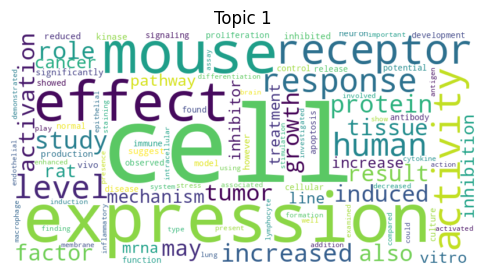

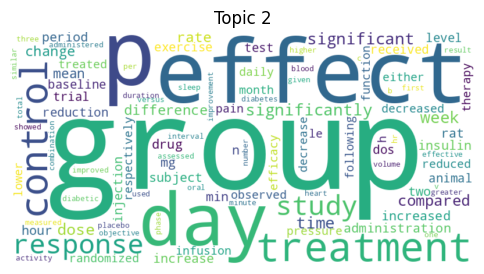

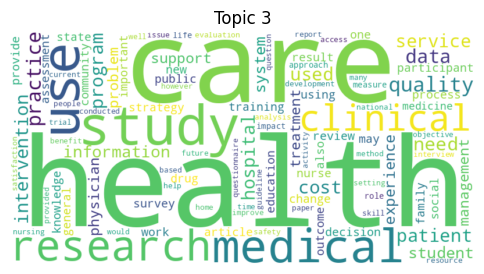

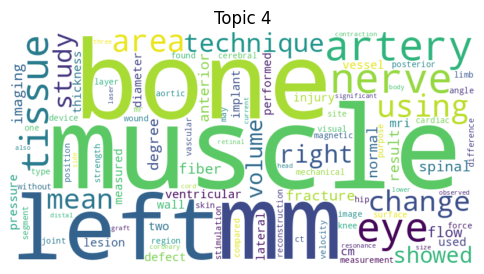

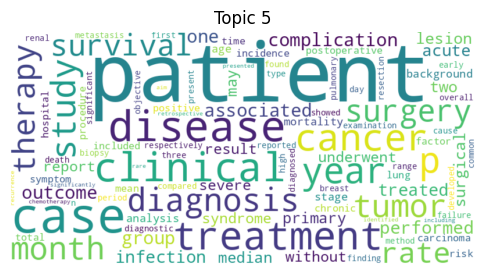

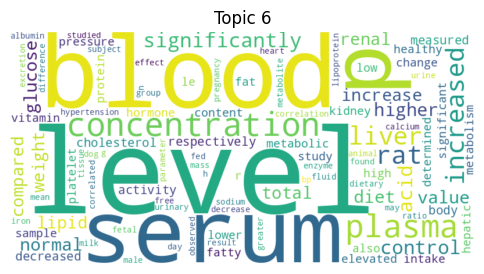

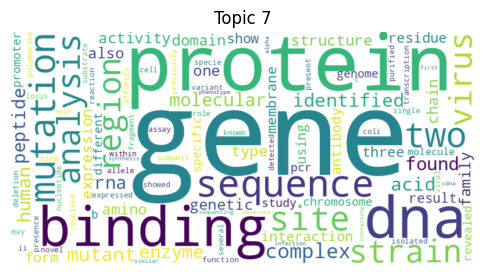

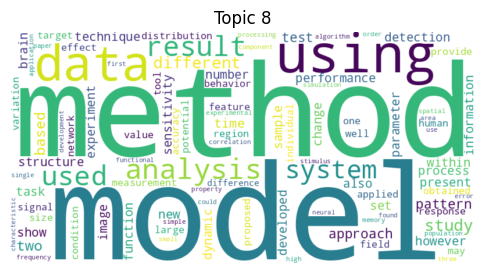

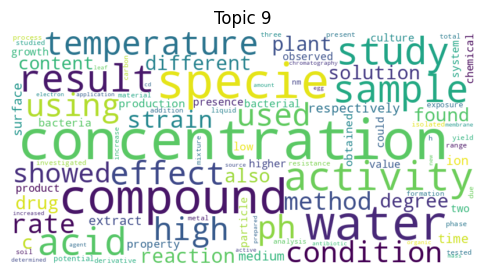

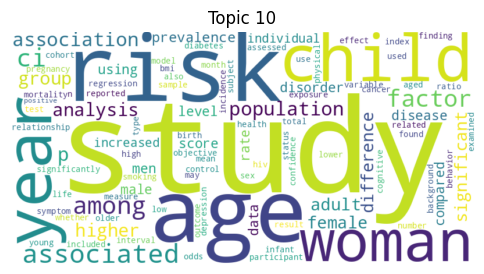

In [ ]:
# Function to generate word cloud for each topic
def generate_wordcloud(lda_model, topic_id, num_words=100):
    topic_words = lda_model.show_topic(topic_id, topn=num_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id + 1}')
    plt.show()

# Generate word clouds for each topic
num_topics = lda_model.num_topics
for i in range(num_topics):
    generate_wordcloud(lda_model, i)


In [ ]:


corpus_topics = [lda_model.get_document_topics(doc) for doc in corpus]  # Assuming 'corpus' is your LDA model's corpus

# Extracting topic distribution for each document
topic_distribution = np.zeros((len(corpus), num_topics))
for i, topics in enumerate(corpus_topics):
    for topic, prob in topics:
        topic_distribution[i, topic] = prob

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
topic_tsne = tsne.fit_transform(topic_distribution)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


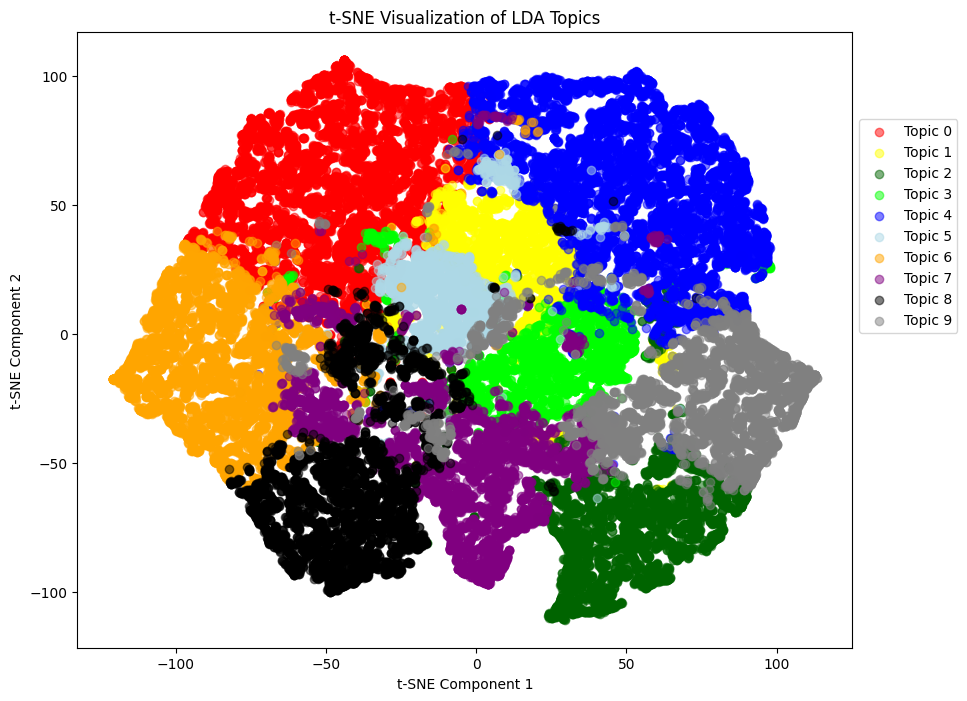

In [ ]:
plt.figure(figsize=(10, 8))
# Assign doc to the predominant topic
doc_topic = np.argmax(topic_distribution, axis=1)
colors = ['r', 'yellow', 'darkgreen', 'lime', 'b', 'lightblue', 'orange', 'purple', 'k', 'gray']
for i in range(10):  # range of topics
    indices = doc_topic == i
    plt.scatter(topic_tsne[indices, 0], topic_tsne[indices, 1], c=colors[i], label=f'Topic {i}', alpha=0.5)
plt.title('t-SNE Visualization of LDA Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()

###Assign topic to each observation

In [ ]:
document_topics = lda_model[corpus]

# Assign doc to the predominant topic
document_topic_assignments = [max(doc[0], key=lambda x: x[1])[0] if doc[0] else None for doc in document_topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sp['Topic'] = document_topic_assignments
print(sp.head())

                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                                           meshMajor  A  B  C  D  E  F  G  H  \
0  ['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...  0  1  1  1  1  0  0  1   
1  ['Adult', 'Alkaline Phosphatase', 'Breast Feed...  0  1  1  1  1  1  1  0   
2  ['Amino Acid Sequence', 'Analgesics, Opioid', ...  1  1  0  1  1  0  1  0   
3  ['Acrylic Resins', 'Alginates', 'Animals', 'Bi...  1  1  1  1  1  0  1  0   
4  ['Antineoplastic Agents', 'Cell Proliferation'...  1  1  0  1  1  0  1  0   

   I  J  L  M  N  Z  word_count  \
0  0  0  0  0  0  0         114   
1  1  1  0  1  1  1         249   
2  0  0  1  0  0  0         106   
3  0  1  0  0  0  0         265   
4  0  1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now we can confront mash labels with topic and find similarity, then select a subset with the topic/label chosen and do topic modeling on that to find higher granularity topics

In [ ]:
sp.drop('Tokens2', axis=1, inplace=True)
sp.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abstractText,meshMajor,A,B,C,D,E,F,G,H,I,J,L,M,N,Z,word_count,Tokens,Topic
0,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",0,1,1,1,1,0,0,1,0,0,0,0,0,0,114,"[paraffin, embedded, tissue, section, patient,...",4
1,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",0,1,1,1,1,1,1,0,1,1,0,1,1,1,249,"[present, study, conducted, determine, vitamin...",9
2,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",1,1,0,1,1,0,1,0,0,0,1,0,0,0,106,"[occurrence, individual, amino, acid, dipeptid...",0
3,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",1,1,1,1,1,0,1,0,0,1,0,0,0,0,265,"[lim, sun, introduced, microcapsule, coated, c...",8
4,Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",1,1,0,1,1,0,1,0,0,1,0,0,0,0,234,"[substantially, improved, hydrogel, particle, ...",8


In [ ]:
# Export what we found so far, so next time we don't have to rerun all of it, we will just import this file
sp.to_csv('/content/gdrive/MyDrive/textdataset/topic.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Understand how many subtopic


In [ ]:
# we need to use a column that we removed, so we import the original dataset
sp = pd.read_csv("/content/gdrive/MyDrive/PubMed Multi Label Text Classification Dataset Processed.csv", encoding="utf-8")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

first_parts = []

for row in sp['meshid']:
    parsed_row = ast.literal_eval(row) # The row value is a string representation of nested lists, so we convert it to a list


    if parsed_row:
      for lista in parsed_row: # we take each list inside of the nested list
        if lista:
          for mesh in lista: # we take each element of the list
            first_element = mesh
            parts = first_element.split('.') # we split the element where there is a .
            first_parts.append(parts[0]) # we take the fisrt part found after the split

# example row=[[D123.456.789][B123.456.789],[D123.456.789][B123.456.789]]->[D123.456.789][B123.456.789]-> D123.456.789 -> [D123,456,789] -> D123

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(np.unique(first_parts))
len(np.unique(first_parts))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['A01' 'A02' 'A03' 'A04' 'A05' 'A06' 'A07' 'A08' 'A09' 'A10' 'A11' 'A12'
 'A13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'B01' 'B02' 'B03'
 'B04' 'B05' 'C01' 'C04' 'C05' 'C06' 'C07' 'C08' 'C09' 'C10' 'C11' 'C12'
 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22' 'C23' 'C24'
 'C25' 'C26' 'D01' 'D02' 'D03' 'D04' 'D05' 'D06' 'D08' 'D09' 'D10' 'D12'
 'D13' 'D20' 'D23' 'D25' 'D26' 'D27' 'E01' 'E02' 'E03' 'E04' 'E05' 'E06'
 'E07' 'F01' 'F02' 'F03' 'F04' 'G01' 'G02' 'G03' 'G04' 'G05' 'G06' 'G07'
 'G08' 'G09' 'G10' 'G11' 'G12' 'G13' 'G14' 'G15' 'G16' 'G17' 'H01' 'H02'
 'I01' 'I02' 'I03' 'J01' 'J02' 'J03' 'K01' 'L01' 'M01' 'N01' 'N02' 'N03'
 'N04' 'N05' 'N06' 'Z01']


112

In [ ]:
mash=sp[sp.columns[6:20]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Environmental Science and Chemistry(topic 9), corresponds to "Chemicals and Drugs [D]" (if discussing environmental compounds) or/and "Geographicals [Z]" (if discussing geographical aspects of environmental science) columns.
So we want to understand how many subtopic are there for Z and D labels

In [ ]:
#num of first parts starting with D or Z, 17
env_label= []
for label in np.unique(first_parts):
  if label[0]=='D' or label[0]=='Z':
    env_label.append(label)
print(len(env_label))
env_label

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17


['D01',
 'D02',
 'D03',
 'D04',
 'D05',
 'D06',
 'D08',
 'D09',
 'D10',
 'D12',
 'D13',
 'D20',
 'D23',
 'D25',
 'D26',
 'D27',
 'Z01']

### Subtopic Modeling

Now we want to perform topic modeling with numtopic=17 on the observations whose topic assigned is 9, Environmental Science and Chemistry

In [ ]:
dftopic=pd.read_csv('/content/gdrive/MyDrive/textdataset/topic.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dftopic['Topic'].value_counts() # so we have 4697 observations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4    8591
0    8169
6    5628
8    5113
7    4860
9    4697
2    4388
3    3217
1    2962
5    2299
Name: Topic, dtype: int64

In [ ]:
dftopic2= dftopic[dftopic['Topic']==9]
dftopic2.reset_index(drop=True)
print(dftopic2.shape)

(4697, 19)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# now we can perform topic modeling

In [ ]:
# aooly preprocessing
dftopic2['Tokens'] = dftopic2['abstractText'].apply(preprocessing)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-74-77ab21539028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftopic2['Tokens'] = dftopic2['abstractText'].apply(preprocessing)


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(dftopic2['Tokens'])

# Create Corpus
texts = dftopic2['Tokens']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2)]


LATENT DIRICHLET ALLOCATION

In [ ]:
lda_model2 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=17,
                                       random_state=100,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       eta="auto",
                                       per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for t in lda_model2.print_topics():
    print(t)
doc_lda = lda_model2[corpus]

(0, '0.029*"risk" + 0.027*"patient" + 0.021*"ci" + 0.019*"mortality" + 0.014*"disease" + 0.014*"study" + 0.014*"year" + 0.013*"age" + 0.011*"death" + 0.009*"associated"')
(1, '0.018*"health" + 0.011*"screening" + 0.010*"disability" + 0.010*"study" + 0.010*"woman" + 0.010*"care" + 0.010*"year" + 0.009*"disease" + 0.008*"older" + 0.008*"age"')
(2, '0.017*"association" + 0.017*"study" + 0.014*"p" + 0.014*"control" + 0.014*"polymorphism" + 0.013*"genotype" + 0.013*"gene" + 0.011*"patient" + 0.011*"associated" + 0.010*"genetic"')
(3, '0.018*"female" + 0.017*"male" + 0.017*"woman" + 0.012*"alcohol" + 0.011*"sexual" + 0.009*"men" + 0.009*"study" + 0.008*"difference" + 0.008*"effect" + 0.007*"relationship"')
(4, '0.020*"child" + 0.015*"infant" + 0.014*"birth" + 0.012*"pregnancy" + 0.012*"age" + 0.012*"group" + 0.011*"study" + 0.009*"month" + 0.008*"maternal" + 0.008*"woman"')
(5, '0.077*"cancer" + 0.038*"risk" + 0.031*"woman" + 0.029*"ci" + 0.021*"breast" + 0.020*"hiv" + 0.019*"among" + 0.015*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




**Topic 0: Risk and Mortality**
- Keywords: risk, patient, ci, mortality, disease, study, year, age, death, associated

**Topic 1: Health and Aging**
- Keywords: health, screening, disability, study, woman, care, year, disease, older, age

**Topic 2: Genetic Associations**
- Keywords: association, study, p, control, polymorphism, genotype, gene, patient, associated, genetic

**Topic 3: Gender and Alcohol**
- Keywords: female, male, woman, alcohol, sexual, men, study, difference, effect, relationship

**Topic 4: Pregnancy and Childbirth**
- Keywords: child, infant, birth, pregnancy, age, group, study, month, maternal, woman

**Topic 5: Cancer and Disease**
- Keywords: cancer, risk, woman, ci, breast, hiv, among, men, hpv, study

**Topic 6: Infection and Vaccination**
- Keywords: infection, prevalence, vaccine, transmission, virus, case, influenza, malaria, vaccination, antibody

**Topic 7: Bone Health and Genetics**
- Keywords: fracture, twin, bone, hip, bmd, genetic, factor, sibling, study, fall

**Topic 8: Health and Smoking**
- Keywords: health, smoking, use, study, among, associated, prevalence, factor, status, year

**Topic 9: Disease Incidence**
- Keywords: rate, incidence, year, per, case, population, country, data, trend, mortality

**Topic 10: Cognitive and Brain**
- Keywords: p, volume, pd, cognitive, effect, associated, â, association, correlation, brain

**Topic 11: Diabetes and Obesity**
- Keywords: p, diabetes, bmi, woman, body, weight, obesity, age, study, mass

**Topic 12: Mental Health and Disorders**
- Keywords: suicide, schizophrenia, population, study, group, hcv, factor, suicidal, family, result

**Topic 13: Depression and Symptoms**
- Keywords: patient, symptom, depression, disorder, scale, score, anxiety, psychiatric, depressive, clinical

**Topic 14: Memory and Cognitive Function**
- Keywords: adhd, white, memory, black, test, function, impairment, stroke, american, ckd

**Topic 15: Child Development**
- Keywords: child, adolescent, parent, behavior, family, study, childhood, cognitive, age, problem

**Topic 16: Injury and Exposure**
- Keywords: study, injury, group, subject, exposure, year, age, test, one, control

 Each topic represents a cluster of words that tend to co-occur frequently within documents in the dataset, suggesting thematic coherence around these keywords.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.289456547562331

Coherence Score:  0.4222941220164357


LATENT SEMANTIC ANALYSIS

In [ ]:
# Rewrite tokens as strings
dftopic2['Tokens2'] = dftopic2['Tokens'].apply(lambda x: ' '.join(x))

# Create the Document-Term Matrix
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(dftopic2['Tokens2'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the documents
X = tfidf_vectorizer.fit_transform(documents)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 17

# Perform LSA (Truncated SVD)
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the most important words for each topic
terms = tfidf_vectorizer.get_feature_names_out()
topic_key_terms = []

# Print topics and their top words
print(f"LSA Model with {num_topics} topics:")
for i, topic in enumerate(lsa_model.components_):
    top_words = ', '.join([terms[idx] for idx in topic.argsort()[:-10 - 1:-1]])
    topic_key_terms.append(top_words)
    print(f"Topic {i + 1}: {top_words}")


LSA Model with 17 topics:
Topic 1: patients, risk, 95, women, ci, children, age, study, years, associated
Topic 2: ci, 95, cancer, risk, women, mortality, breast, confidence, ratio, odds
Topic 3: children, ci, 95, child, infants, mothers, birth, parents, age, maternal
Topic 4: women, hiv, men, sexual, pregnancy, health, use, pregnant, alcohol, infection
Topic 5: hiv, patients, infection, infected, children, ci, 95, art, transmission, treatment
Topic 6: cancer, ci, 95, depression, symptoms, children, health, anxiety, use, self
Topic 7: women, patients, infants, cancer, pregnancy, birth, breast, depression, mothers, maternal
Topic 8: cancer, breast, mortality, cases, lung, genetic, incidence, risk, smoking, population
Topic 9: mortality, years, health, rates, incidence, age, year, death, rate, older
Topic 10: infants, birth, exposure, maternal, alcohol, mothers, mortality, pregnancy, infant, preterm
Topic 11: hiv, infants, cancer, bmi, smoking, weight, mortality, obesity, cognitive, body

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = []
for topic in lsa_model.components_:
    topic_terms = [terms[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(topic_terms)
# Create dictionary and corpus required for coherence model
texts = [doc.split() for doc in dftopic2['Tokens2']]
id2word2 = Dictionary(texts)
corpus2 = [id2word2.doc2bow(text) for text in texts]

# Compute Coherence Score using the c_v measure
coherence_model_lda = CoherenceModel(topics=topics, texts=texts, dictionary=id2word2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# the coherence score is higher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.529751879710176





1. **Topic 1: Patient Demographics and Risk Factors**
   - Keywords: patients, risk, 95, women, ci, children, age, study, years, associated
   - Interpretation: This topic likely discusses demographic characteristics of patients in studies, focusing on various risk factors associated with age, gender (women), and study parameters.

2. **Topic 2: Cancer and Mortality**
   - Keywords: ci, 95, cancer, risk, women, mortality, breast, confidence, ratio, odds
   - Interpretation: This topic is centered around cancer research, specifically discussing mortality rates, risk factors (like gender), and statistical measures (confidence intervals).

3. **Topic 3: Child Health and Maternal Factors**
   - Keywords: children, ci, 95, child, infants, mothers, birth, parents, age, maternal
   - Interpretation: Focuses on child health, including maternal influences (mothers, birth), developmental stages (infants, children), and associated factors studied with statistical confidence.

4. **Topic 4: Women's Health and Infectious Diseases**
   - Keywords: women, hiv, men, sexual, pregnancy, health, use, pregnant, alcohol, infection
   - Interpretation: Discusses women's health issues such as HIV, sexual health, pregnancy-related concerns, and alcohol use, within the context of infectious diseases.

5. **Topic 5: HIV Treatment and Transmission**
   - Keywords: hiv, patients, infection, infected, children, ci, 95, art, transmission, treatment
   - Interpretation: Focuses on HIV infection and treatment strategies, including transmission dynamics (art = antiretroviral therapy) among patients and children.

6. **Topic 6: Cancer and Mental Health**
   - Keywords: cancer, ci, 95, depression, symptoms, children, health, anxiety, use, self
   - Interpretation: Explores the intersection of cancer research with mental health aspects, including depression, anxiety, and self-reported symptoms among patients.

7. **Topic 7: Women's Health and Pregnancy Outcomes**
   - Keywords: women, patients, infants, cancer, pregnancy, birth, breast, depression, mothers, maternal
   - Interpretation: Focuses on women's health issues related to pregnancy outcomes, maternal health, and impacts on infants and breast cancer patients.

8. **Topic 8: Cancer Epidemiology and Genetic Factors**
   - Keywords: cancer, breast, mortality, cases, lung, genetic, incidence, risk, smoking, population
   - Interpretation: Discusses cancer epidemiology, genetic predispositions, mortality rates, and the influence of smoking within specific populations.

9. **Topic 9: Mortality Rates and Aging**
   - Keywords: mortality, years, health, rates, incidence, age, year, death, rate, older
   - Interpretation: Analyzes mortality rates across different age groups, health implications, and trends observed over years.

10. **Topic 10: Infant Health and Maternal Influences**
    - Keywords: infants, birth, exposure, maternal, alcohol, mothers, mortality, pregnancy, infant, preterm
    - Interpretation: Focuses on infant health outcomes, maternal influences (alcohol use, pregnancy), and risks associated with preterm births.

11. **Topic 11: HIV, BMI, and Lifestyle Factors**
    - Keywords: hiv, infants, cancer, bmi, smoking, weight, mortality, obesity, cognitive, body
    - Interpretation: Explores HIV impacts on BMI (Body Mass Index), smoking habits, weight issues, mortality risks, and cognitive functions.

12. **Topic 12: Alcohol Use, Smoking, and Disease Risk**
    - Keywords: alcohol, smoking, patients, use, drinking, diabetes, consumption, children, smokers, risk
    - Interpretation: Discusses health risks associated with alcohol consumption, smoking habits, diabetes, and their impact on patients' health, including children and smokers.

13. **Topic 13: Diabetes and Cardiovascular Health**
    - Keywords: diabetes, risk, health, depression, mortality, type, factors, symptoms, disease, cardiovascular
    - Interpretation: Focuses on diabetes-related health risks, including cardiovascular implications, symptoms, and associated factors influencing mortality rates.

14. **Topic 14: Mental Health and Gender Differences**
    - Keywords: males, infants, sexual, females, depression, male, weight, patients, bmi, alcohol
    - Interpretation: Analyzes mental health issues across genders (males, females), including depression, sexual health, weight concerns, BMI, and alcohol use.

15. **Topic 15: Smoking, Asthma, and Psychological Symptoms**
    - Keywords: smoking, smokers, exposure, prevalence, symptoms, asthma, depression, anxiety, levels, tobacco
    - Interpretation: Discusses smoking-related issues like exposure, prevalence, and associated psychological symptoms such as asthma, depression, and anxiety.

16. **Topic 16: Mental Health Issues Across Ages**
    - Keywords: mortality, anxiety, depression, males, levels, men, symptoms, children, females, women
    - Interpretation: Explores mental health challenges across different age groups (children, adults, elderly), genders, and associated symptoms like anxiety and depression.

17. **Topic 17: Risk Factors and Cognitive Health**
    - Keywords: risk, sexual, factors, men, age, subjects, ad, cognitive, disease, sex
    - Interpretation: Focuses on risk factors affecting cognitive health, including sexual health implications, demographic subjects, Alzheimer's disease (ad), and cognitive functions.

